## **Loading The Pre-trained Model and Inferencing Scripts**

In [ ]:
!git clone https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life.git photo_restoration

Cloning into 'photo_restoration'...
remote: Enumerating objects: 509, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 509 (delta 3), reused 5 (delta 1), pack-reused 501
Receiving objects: 100% (509/509), 40.90 MiB | 25.86 MiB/s, done.
Resolving deltas: 100% (227/227), done.


In [ ]:
%cd photo_restoration/Face_Enhancement/models/networks
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../../

%cd Global/detection_models
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../

%cd Face_Detection/
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
%cd ../

%cd Face_Enhancement/
!wget https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life/releases/download/v1.0/face_checkpoints.zip
!unzip face_checkpoints.zip
%cd ../

%cd Global/
!wget https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life/releases/download/v1.0/global_checkpoints.zip
!unzip global_checkpoints.zip
%cd ../

In [ ]:
! pip install -r requirements.txt

## **Inferencing for Old Images without Scratches**

The Output folder contains the intermediate as well as overall restored images. To store intermediate results for both with scratches and without scratches, you have to choose different names for the folder.

In [ ]:
%cd /content/photo_restoration/
input_folder = "test_images/old"
output_folder = "output"

import os
basepath = os.getcwd()
input_path = os.path.join(basepath, input_folder)
output_path = os.path.join(basepath, output_folder)
os.mkdir(output_path)

!python run.py --input_folder /content/photo_restoration/test_images/old --output_folder /content/photo_restoration/output/ --GPU 0

/content/photo_restoration
Running Stage 1: Overall restoration
Mapping: You are using the mapping model without global restoration.
Now you are processing a.png
Now you are processing b.png
Now you are processing c.png
Now you are processing d.png
Now you are processing e.png
Now you are processing f.png
Now you are processing g.png
Now you are processing h.png
Finish Stage 1 ...


Running Stage 2: Face Detection
1
1
1
1
Finish Stage 2 ...


Running Stage 3: Face Enhancement
The main GPU is 
0
dataset [FaceTestDataset] of size 4 was created
The size of the latent vector size is [8,8]
Network [SPADEGenerator] was created. Total number of parameters: 92.1 million. To see the architecture, do print(network).
hi :)
Finish Stage 3 ...


Running Stage 4: Blending
Traceback (most recent call last):
  File "/content/photo_restoration/Face_Detection/align_warp_back_multiple_dlib.py", line 428, in <module>
    blended = blur_blending_cv2(warped_back, blended, backward_mask)
  File "/content/pho

In [ ]:
import io
import IPython.display
import numpy as np
import PIL.Image

def imshow(a, format='png', jpeg_fallback=True):
    a = np.asarray(a, dtype=np.uint8)
    data = io.BytesIO()
    PIL.Image.fromarray(a).save(data, format)
    im_data = data.getvalue()
    try:
      disp = IPython.display.display(IPython.display.Image(im_data))
    except IOError:
      if jpeg_fallback and format != 'jpeg':
        print(('Warning: image was too large to display in format "{}"; '
              'trying jpeg instead.').format(format))
        return imshow(a, format='jpeg')
      else:
        raise
    return disp

def make_grid(I1, I2, resize=True):
    I1 = np.asarray(I1)
    H, W = I1.shape[0], I1.shape[1]

    if I1.ndim >= 3:
        I2 = np.asarray(I2.resize((W,H)))
        I_combine = np.zeros((H,W*2,3))
        I_combine[:,:W,:] = I1[:,:,:3]
        I_combine[:,W:,:] = I2[:,:,:3]
    else:
        I2 = np.asarray(I2.resize((W,H)).convert('L'))
        I_combine = np.zeros((H,W*2))
        I_combine[:,:W] = I1[:,:]
        I_combine[:,W:] = I2[:,:]
    I_combine = PIL.Image.fromarray(np.uint8(I_combine))

    W_base = 600
    if resize:
      ratio = W_base / (W*2)
      H_new = int(H * ratio)
      I_combine = I_combine.resize((W_base, H_new), PIL.Image.LANCZOS)

    return I_combine

a.png


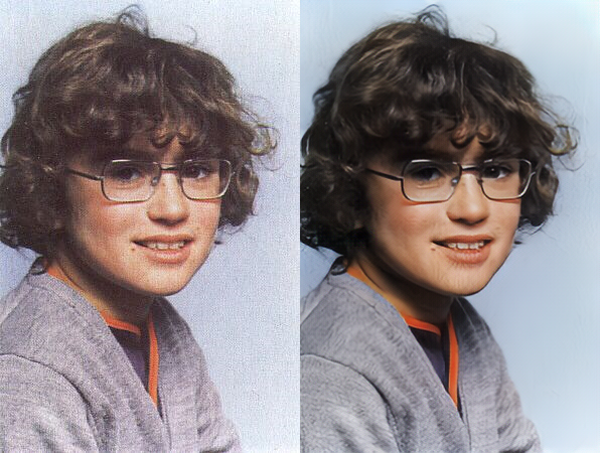

b.png


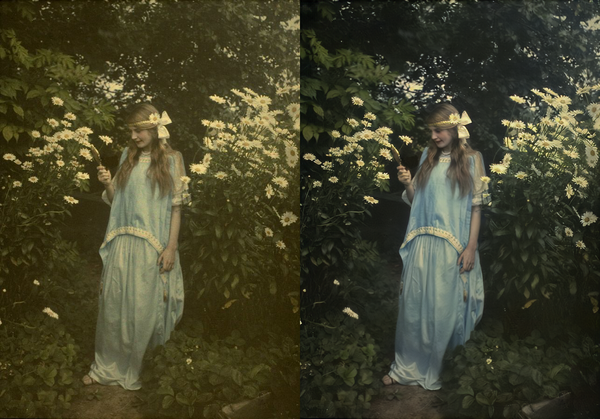

c.png


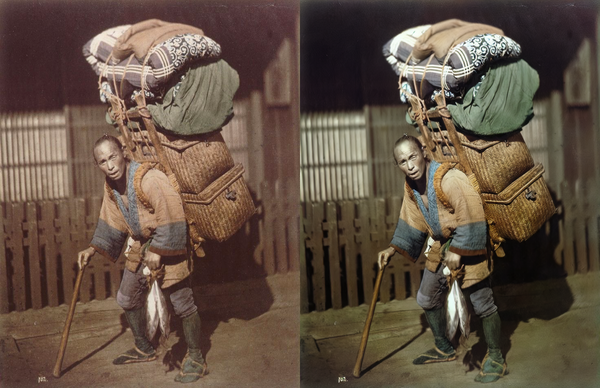

d.png


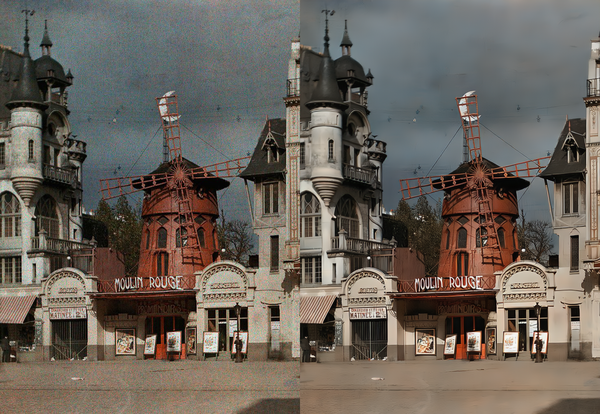

e.png


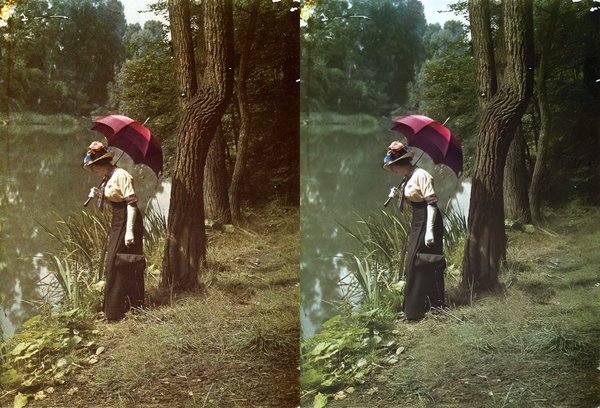

f.png


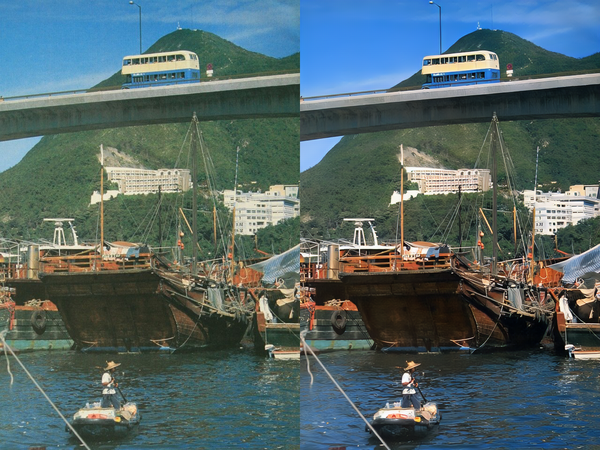

g.png


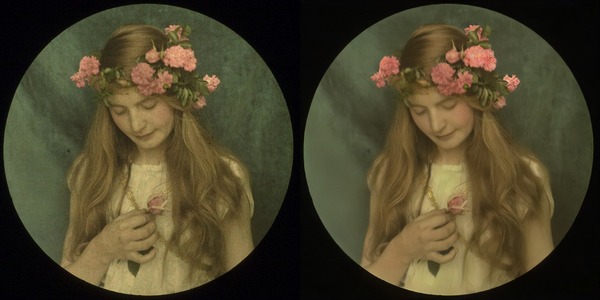

h.png


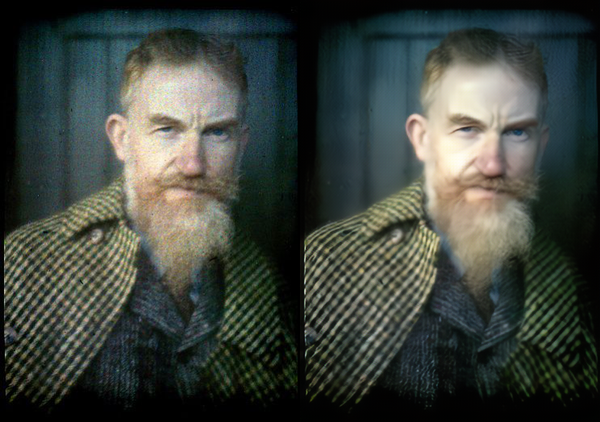

In [ ]:
filenames = os.listdir(os.path.join(input_path))
filenames.sort()

for filename in filenames:
    print(filename)
    image_original = PIL.Image.open(os.path.join(input_path, filename))
    image_restore = PIL.Image.open(os.path.join(output_path, 'final_output', filename))

    display(make_grid(image_original, image_restore))

## **Inferencing for Old Images with Scratches**
Change the output folder path if you wish to store results for both, otherwise it will overwrite.

In [ ]:
!rm -rf /content/photo_restoration/output/*
!python run.py --input_folder /content/photo_restoration/test_images/old_w_scratch/ --output_folder /content/photo_restoration/output/ --GPU 0 --with_scratch

Running Stage 1: Overall restoration
initializing the dataloader
model weights loaded
directory of testing image: /content/photo_restoration/test_images/old_w_scratch
processing a.png
processing b.png
processing c.png
processing d.png
You are using NL + Res
Now you are processing a.png
Now you are processing b.png
Now you are processing c.png
Now you are processing d.png
Finish Stage 1 ...


Running Stage 2: Face Detection
1
1
2
1
Finish Stage 2 ...


Running Stage 3: Face Enhancement
The main GPU is 
0
dataset [FaceTestDataset] of size 5 was created
The size of the latent vector size is [8,8]
Network [SPADEGenerator] was created. Total number of parameters: 92.1 million. To see the architecture, do print(network).
hi :)
Finish Stage 3 ...


Running Stage 4: Blending
Traceback (most recent call last):
  File "/content/photo_restoration/Face_Detection/align_warp_back_multiple_dlib.py", line 428, in <module>
    blended = blur_blending_cv2(warped_back, blended, backward_mask)
  File "/co

a.png


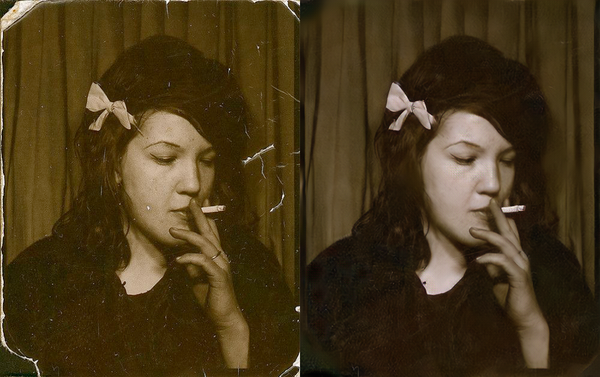

b.png


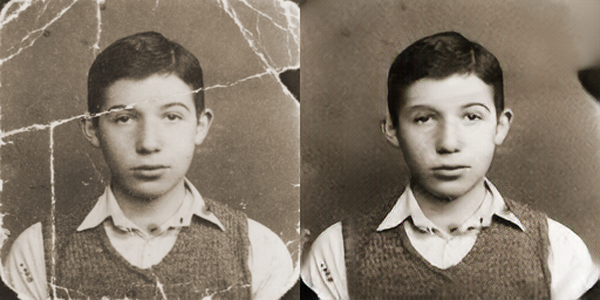

c.png


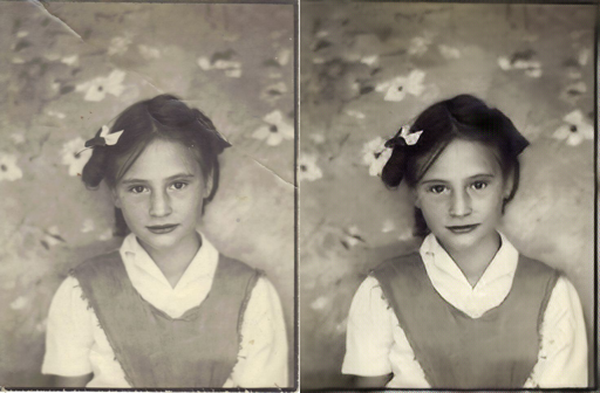

d.png


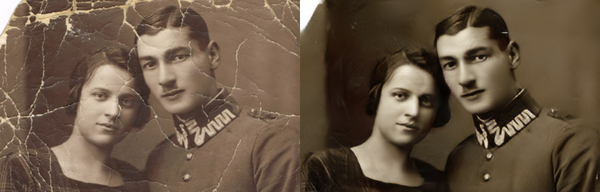

In [ ]:
input_folder = "test_images/old_w_scratch"
output_folder = "output"
input_path = os.path.join(basepath, input_folder)
output_path = os.path.join(basepath, output_folder)

filenames = os.listdir(os.path.join(input_path))
filenames.sort()

for filename in filenames:
    print(filename)
    image_original = PIL.Image.open(os.path.join(input_path, filename))
    image_restore = PIL.Image.open(os.path.join(output_path, 'final_output', filename))

    display(make_grid(image_original, image_restore))

# **Trying On a New Dataset**
Upload archive (1).zip file first.

In [ ]:
!unzip '/content/archive (1).zip'

Archive:  /content/archive (1).zip
  inflating: dataset/img1.jpg        
  inflating: dataset/img10.jpg       
  inflating: dataset/img100.jpg      
  inflating: dataset/img101.jpg      
  inflating: dataset/img102.jpg      
  inflating: dataset/img103.jpg      
  inflating: dataset/img104.jpg      
  inflating: dataset/img105.jpg      
  inflating: dataset/img106.jpg      
  inflating: dataset/img107.jpg      
  inflating: dataset/img108.jpg      
  inflating: dataset/img109.jpg      
  inflating: dataset/img11.jpg       
  inflating: dataset/img110.jpg      
  inflating: dataset/img111.jpg      
  inflating: dataset/img112.jpg      
  inflating: dataset/img113.jpg      
  inflating: dataset/img114.jpg      
  inflating: dataset/img115.jpg      
  inflating: dataset/img116.jpg      
  inflating: dataset/img117.jpg      
  inflating: dataset/img118.jpg      
  inflating: dataset/img119.jpg      
  inflating: dataset/img12.jpg       
  inflating: dataset/img120.jpg      
  inflating: da

In [ ]:
!mkdir upload_output

Results stored in upload_output_path (to be specified as flag while running the below script)


In [ ]:
!python run.py --input_folder /content/photo_restoration/dataset --output_folder /content/photo_restoration/upload_output --GPU 0 --with_scratch --HR

Running Stage 1: Overall restoration
initializing the dataloader
model weights loaded
directory of testing image: /content/photo_restoration/dataset
processing img1.jpg
processing img10.jpg
processing img100.jpg
processing img101.jpg
processing img102.jpg
processing img103.jpg
processing img104.jpg
processing img105.jpg
processing img106.jpg
processing img107.jpg
processing img108.jpg
processing img109.jpg
processing img11.jpg
processing img110.jpg
processing img111.jpg
processing img112.jpg
processing img113.jpg
processing img114.jpg
processing img115.jpg
processing img116.jpg
processing img117.jpg
processing img118.jpg
processing img119.jpg
processing img12.jpg
processing img120.jpg
processing img121.jpg
processing img122.jpg
processing img123.jpg
processing img124.jpg
processing img125.jpg
processing img126.jpg
processing img127.jpg
processing img128.jpg
processing img129.jpg
processing img13.jpg
processing img130.jpg
processing img131.jpg
processing img132.jpg
processing img133.jpg

In [ ]:
upload_path= '/content/photo_restoration/dataset'
upload_output_path = os.path.join(basepath, "upload_output")
filenames_upload = os.listdir(os.path.join(upload_path))
filenames_upload.sort()

filenames_upload_output = os.listdir(os.path.join(upload_output_path, "final_output"))
filenames_upload_output.sort()

for filename, filename_output in zip(filenames_upload, filenames_upload_output):
    image_original = PIL.Image.open(os.path.join(upload_path, filename))
    image_restore = PIL.Image.open(os.path.join(upload_output_path, "final_output", filename_output))

    display(make_grid(image_original, image_restore))
    print("")

## **PSNR for Original Dataset in The Paper**

In [ ]:
import cv2
import os

def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100  # Images are identical, PSNR is infinity.
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def calculate_average_psnr(folder_path1,folder_path2):
    psnr_sum = 0
    image_count = 0

    for filename in os.listdir(folder_path1):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path1 = os.path.join(folder_path1, filename)
            image_path2 = os.path.join(folder_path2, filename)
            # image_path2= image_path2[:len(image_path2)-3]+ 'jpg'
            img = cv2.imread(image_path1)
            img2 = cv2.imread(image_path2)
            img = cv2.resize(img, (img2.shape[1], img2.shape[0]))
             # You can replace this with another image for comparison.
            # print(image_path1)
            # print(image_path2)
            psnr = calculate_psnr(img, img2)
            psnr_sum += psnr
            image_count += 1

    if image_count == 0:
        print("Images 0")
        return 0  # To avoid division by zero

    average_psnr = psnr_sum / image_count
    return average_psnr

folder_path1= '/content/photo_restoration/test_images/old_w_scratch'
folder_path2= '/content/photo_restoration/output/final_output'
avg_psnr = calculate_average_psnr(folder_path1,folder_path2)
print(f'Average PSNR for images: {avg_psnr:.2f}')

Average PSNR for images: 28.20


## **SSIM for Original Dataset**

In [ ]:
from skimage import io, color, metrics
import os

def calculate_ssim_for_folders(generated_folder, real_folder):
    generated_images = [os.path.join(generated_folder, img) for img in os.listdir(generated_folder)]
    real_images = [os.path.join(real_folder, img) for img in os.listdir(real_folder)]

    total_ssim = 0
    num_images = 0

    for generated_image_path, real_image_path in zip(generated_images, real_images):
        generated_image = io.imread(generated_image_path)
        real_image = io.imread(real_image_path)

        # Ensure both images are in RGB format
        if generated_image.shape[-1] == 4:
            generated_image = generated_image[:, :, :3]  # Discard the alpha channel
        if real_image.shape[-1] == 4:
            real_image = real_image[:, :, :3]  # Discard the alpha channel

        # Convert to grayscale
        if len(generated_image.shape) == 3:
            generated_image = color.rgb2gray(generated_image)
        if len(real_image.shape) == 3:
            real_image = color.rgb2gray(real_image)

        # Calculate SSIM
        real_image = cv2.resize(real_image, (generated_image.shape[1],generated_image.shape[0]))
        ssim = metrics.structural_similarity(generated_image, real_image)
        total_ssim += ssim
        num_images += 1

    if num_images == 0:
        return 0  # To avoid division by zero

    average_ssim = total_ssim / num_images
    return average_ssim


generated_folder_path = '/content/photo_restoration/output/final_output'
real_folder_path = '/content/photo_restoration/test_images/old_w_scratch'

average_ssim = calculate_ssim_for_folders(generated_folder_path, real_folder_path)
print(f'Average SSIM between the two folders: {average_ssim:.4f}')


Average SSIM between the two folders: 0.8127


## **PSNR for Kaggle Dataset**

In [ ]:
import cv2
import os

def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100  # Images are identical, PSNR is infinity.
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def calculate_average_psnr(folder_path1,folder_path2):
    psnr_sum = 0
    image_count = 0

    for filename in os.listdir(folder_path1):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path1 = os.path.join(folder_path1, filename)
            image_path2 = os.path.join(folder_path2, filename)
            image_path2= image_path2[:len(image_path2)-3]+ 'jpg'
            img = cv2.imread(image_path1)
            img2 = cv2.imread(image_path2)
            img = cv2.resize(img, (img2.shape[1], img2.shape[0]))
             # You can replace this with another image for comparison.
            # print(image_path1)
            # print(image_path2)
            psnr = calculate_psnr(img, img2)
            psnr_sum += psnr
            image_count += 1

    if image_count == 0:
        print("Images 0")
        return 0  # To avoid division by zero

    average_psnr = psnr_sum / image_count
    return average_psnr

folder_path1= '/content/photo_restoration/upload_output/final_output'
folder_path2= '/content/photo_restoration/dataset'
avg_psnr = calculate_average_psnr(folder_path1,folder_path2)
print(f'Average PSNR for images in {folder_path2}: {avg_psnr:.2f}')


Average PSNR for images in /content/photo_restoration/dataset: 30.07


## **SSIM for Kaggle Dataset**

In [ ]:
generated_folder_path = '/content/photo_restoration/upload_output/final_output'
real_folder_path = '/content/photo_restoration/dataset'

average_ssim = calculate_ssim_for_folders(generated_folder_path, real_folder_path)
print(f'Average SSIM between the two folders: {average_ssim:.4f}')

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


Average SSIM between the two folders: 0.3771
